In [1]:
import pandas as pd
import numpy as np
import copy as cp

import statsmodels.api as sm
import matplotlib.pyplot as plt

import sklearn.metrics as metrics

from sklearn.linear_model import LinearRegression, ElasticNetCV
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from xgboost.sklearn import XGBRegressor

from heatmap import heatmap, corrplot

In [2]:
onedrive_path = "C:/Users/cfowle/The Estée Lauder Companies Inc/TeamAnis - General/"

In [4]:
counts = pd.read_csv(onedrive_path + "Output/2020_07_06_to_rama/counts.csv")

In [30]:
counts = counts.loc[counts["demand"] > 0]
counts = counts.loc[counts["nb_reviews"] > 0]
counts = counts.sort_values("month")

In [13]:
for col in counts.columns:
    print(col)

Unnamed: 0
elc_brand
date
sub_category
major_category_id
avg_nb_statements
nb_reviews
rating
rating_1
rating_2
rating_3
rating_4
rating_5
sentiment_negative
sentiment_neutral
sentiment_positive
sentiment
demand_P1
demand_P2
demand
demand_F1
demand_F2
Complaints
Compliments
Questions
Suggestions
Complaints_Availability_GBNF
Complaints_Availability_Location
Complaints_Availability_Product Availability
Complaints_Corporate_ELC
Complaints_Corporate_Environmental
Complaints_Corporate_Pricing
Complaints_Corporate_Privacy
Complaints_Corporate_Testing
Complaints_Corporate_Unauthorized Account
Complaints_Formula / Ingredients_Formula
Complaints_Marketing & PR_Advertising
Complaints_Marketing & PR_Back To M.A.C
Complaints_Marketing & PR_Brand Program
Complaints_Marketing & PR_Loyalty
Complaints_Marketing & PR_Marketing General
Complaints_Marketing & PR_Promotions/GWP/PWP
Complaints_Order_Availability
Complaints_Order_Delivery
Complaints_Order_Options/Status
Complaints_Order_Returns
Complaints_Pr

In [31]:
counts_selected = counts[["avg_subcat_demand", "avg_brand_demand", "month", "year", "monthly_avg_demand", 
                          "avg_12_month_demand", "rating", "rating_1", "rating_2", "rating_3", "rating_4", 
                          "rating_5", "sentiment_negative", "sentiment_neutral", "sentiment_positive", "sentiment",
                          "demand_P1", "demand_P2", "demand", "demand_F1", "Complaints", "Compliments", "Questions",
                          "Suggestions"]].dropna()

In [32]:
y = counts_selected.pop("demand_F1")

In [33]:
X = StandardScaler().fit_transform(counts_selected)

Text(0, 0.5, 'cumulative explained variance')

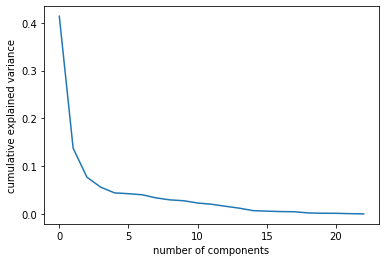

In [34]:
pca = PCA().fit(X)
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [35]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(principalDf, y, shuffle = False)

In [37]:
lm = LinearRegression()
lm.fit(X_train, y_train)
pred = lm.predict(X_test)
metrics.r2_score(pred, y_test)

0.7136011757931674

In [38]:
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train.values, X2)
est2 = est.fit()

print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     5814.
Date:                Tue, 07 Jul 2020   Prob (F-statistic):               0.00
Time:                        11:01:39   Log-Likelihood:                -98860.
No. Observations:                7638   AIC:                         1.977e+05
Df Residuals:                    7633   BIC:                         1.978e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.329e+04   1330.037     55.100      0.0

In [39]:
for i,x in enumerate(pca.components_):
    print("Feature " + str(i), ", Explains " + str(pca.explained_variance_[i]))
    top = x.argsort()[-5:][::-1]
    table = [list(counts_selected.columns[top]), x[top]]
    df = pd.DataFrame(np.transpose(table))
    print(df)

Feature 0 , Explains 9.521664365659232
                    0                    1
0   sentiment_neutral  0.29635228005869235
1            rating_5     0.29366798647256
2  sentiment_positive   0.2894997027907376
3  sentiment_negative   0.2852725090819049
4            rating_1  0.25812961095935033
Feature 1 , Explains 3.167893130804979
                    0                    1
0            rating_3   0.3233171695209387
1            rating_4  0.30764428935306076
2            rating_2  0.23575639943515989
3  sentiment_negative  0.23465783672678356
4  sentiment_positive   0.2158899752549769
Feature 2 , Explains 1.7658883008550244
                     0                     1
0  avg_12_month_demand    0.6287742098819212
1                month    0.5801863494524759
2   monthly_avg_demand    0.4844968274586185
3                 year    0.0808678214064756
4     avg_brand_demand  0.057330566787851894
Feature 3 , Explains 1.2857989423403633
                   0                    1
0             

## Let's try making PCA features for demand & sentiment seperately

In [40]:
demand_features = counts_selected[["avg_subcat_demand", "avg_brand_demand", "month", "year", "monthly_avg_demand", 
                    "avg_12_month_demand","demand_P1", "demand_P2", "demand"]]
sentiment_features = counts_selected[[ "month", "year", "rating", "rating_1", "rating_2", "rating_3", "rating_4", 
                          "rating_5", "sentiment_negative", "sentiment_neutral", "sentiment_positive", "sentiment",
                                      "Complaints", "Compliments", "Questions", "Suggestions"]]


In [64]:
X = StandardScaler().fit_transform(demand_features)

Text(0, 0.5, 'cumulative explained variance')

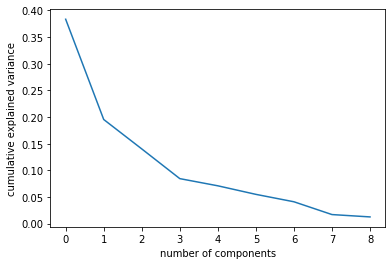

In [65]:
pca = PCA().fit(X)
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [66]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
demand_comp = pd.DataFrame(data = principalComponents)

In [67]:
for i,x in enumerate(pca.components_):
    print("Feature " + str(i), ", Explains " + str(pca.explained_variance_[i]))
    top = x.argsort()[-5:][::-1]
    table = [list(demand_features.columns[top]), x[top]]
    df = pd.DataFrame(np.transpose(table))
    print(df)

Feature 0 , Explains 3.450473975635865
                   0                    1
0             demand    0.506914392562998
1          demand_P1  0.49602617635302093
2          demand_P2  0.48518384387942404
3  avg_subcat_demand   0.3617723331816796
4   avg_brand_demand   0.3366806560102103
Feature 1 , Explains 1.758247322326054
                   0                      1
0          demand_P2    0.09386173169842056
1          demand_P1    0.08986742767803474
2             demand    0.08173713841143068
3  avg_subcat_demand  -0.007777156356651491
4   avg_brand_demand  -0.026438482235542068
Feature 2 , Explains 1.2616989914612327
                     0                    1
0                month  0.43302434999869893
1  avg_12_month_demand  0.07710822987881681
2            demand_P2  0.05605444194769019
3            demand_P1    0.050840012973374
4               demand  0.04058882433199172


In [68]:
X = StandardScaler().fit_transform(sentiment_features)

Text(0, 0.5, 'cumulative explained variance')

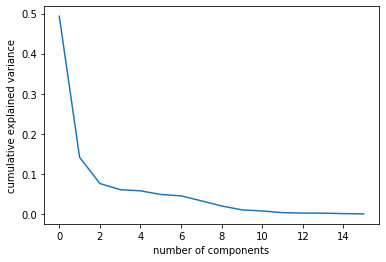

In [69]:
pca = PCA().fit(X)
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [70]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
sentiment_comp = pd.DataFrame(data = principalComponents)
sentiment_comp.columns = ["sent_1", "sent_2"]

In [71]:
for i,x in enumerate(pca.components_):
    print("Feature " + str(i), ", Explains " + str(pca.explained_variance_[i]))
    top = x.argsort()[-5:][::-1]
    table = [list(sentiment_features.columns[top]), x[top]]
    df = pd.DataFrame(np.transpose(table))
    print(df)

Feature 0 , Explains 7.893095729576409
                    0                    1
0   sentiment_neutral   0.3445427831979888
1  sentiment_positive  0.33812546579082386
2  sentiment_negative  0.33723686643414746
3            rating_5   0.3335903564333976
4            rating_3  0.30785629505168105
Feature 1 , Explains 2.2628784019000396
                    0                    1
0            rating_3  0.25291039761559936
1            rating_4   0.2414152032250002
2            rating_2   0.1582380768413051
3  sentiment_negative  0.15114545864121912
4  sentiment_positive  0.13792510426792498


In [72]:
X = pd.concat([sentiment_comp, demand_comp], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False)

In [73]:
lm = LinearRegression()
lm.fit(X_train, y_train)
pred = lm.predict(X_test)
metrics.r2_score(pred, y_test)

0.8253944365188743

In [63]:
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train.values, X2)
est2 = est.fit()

print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     6168.
Date:                Tue, 07 Jul 2020   Prob (F-statistic):               0.00
Time:                        11:06:45   Log-Likelihood:                -98021.
No. Observations:                7638   AIC:                         1.961e+05
Df Residuals:                    7632   BIC:                         1.961e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.704e+04   1204.319     55.664      0.0

### Let do this again with just the rating columns + CC

In [74]:
sentiment_features = counts_selected[[ "month", "year", "rating", "rating_1", "rating_2", "rating_3", "rating_4", 
                          "rating_5", "Complaints", "Compliments", "Questions", "Suggestions"]]

Text(0, 0.5, 'cumulative explained variance')

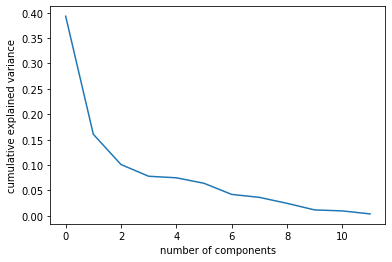

In [75]:
X = StandardScaler().fit_transform(sentiment_features)
pca = PCA().fit(X)
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [76]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
sentiment_comp = pd.DataFrame(data = principalComponents)
sentiment_comp.columns = ["sent_1", "sent_2", "sent_3"]

In [77]:
for i,x in enumerate(pca.components_):
    print("Feature " + str(i), ", Explains " + str(pca.explained_variance_[i]))
    top = x.argsort()[-5:][::-1]
    table = [list(sentiment_features.columns[top]), x[top]]
    df = pd.DataFrame(np.transpose(table))
    print(df)

Feature 0 , Explains 4.717214874478803
          0                    1
0  rating_5    0.418239994850753
1  rating_3   0.3847545311926819
2  rating_4   0.3795213227792368
3  rating_2  0.37491410461957214
4  rating_1   0.3722274681888062
Feature 1 , Explains 1.9274887339224998
          0                     1
0  rating_3   0.32138789376591353
1  rating_4    0.3044256179827735
2  rating_2   0.22802618241318928
3  rating_5   0.14328646441041915
4  rating_1  0.017853563344856216
Feature 2 , Explains 1.2122385453158049
             0                    1
0        month   0.7201010712739895
1    Questions  0.07315647989176699
2  Compliments  0.06925235908461834
3   Complaints  0.06465921243719339
4  Suggestions  0.06006922121034491


These really are just capturing the number of counts--nothing about the sentment. Let's try dropping ratings and using only sentiment

In [82]:
sentiment_features = counts_selected[[ "month", "year", "sentiment_negative", "sentiment_neutral", "sentiment_positive", "sentiment",
                                      "Complaints", "Compliments", "Questions", "Suggestions"]]

Text(0, 0.5, 'cumulative explained variance')

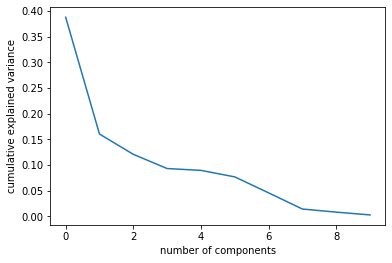

In [83]:
X = StandardScaler().fit_transform(sentiment_features)
pca = PCA().fit(X)
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [84]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
sentiment_comp = pd.DataFrame(data = principalComponents)
sentiment_comp.columns = ["sent_1", "sent_2", "sent_3"]

In [85]:
for i,x in enumerate(pca.components_):
    print("Feature " + str(i), ", Explains " + str(pca.explained_variance_[i]))
    top = x.argsort()[-5:][::-1]
    table = [list(sentiment_features.columns[top]), x[top]]
    df = pd.DataFrame(np.transpose(table))
    print(df)

Feature 0 , Explains 3.879663194850414
                    0                    1
0   sentiment_neutral   0.4561626301295624
1  sentiment_positive   0.4446494365144844
2  sentiment_negative   0.4359238942474693
3           sentiment   0.3873351970118314
4          Complaints  0.35625651564013133
Feature 1 , Explains 1.6036346082065382
                    0                     1
0  sentiment_negative   0.34164050094901827
1  sentiment_positive   0.33821176596668767
2   sentiment_neutral    0.3174112568883204
3               month   0.03785995135987693
4           sentiment  -0.12270312345051597
Feature 2 , Explains 1.2087395615121488
             0                    1
0        month   0.7213511642823726
1    Questions   0.0903303088168063
2  Compliments  0.08678300410625155
3   Complaints  0.08205685388370998
4  Suggestions   0.0728731339537354


What if we had relative and count features in the same dataset?